<a href="https://colab.research.google.com/github/PaoPla/Evaluaci-n/blob/main/Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [297]:
#Carga desde un archivo .csv sin indice
california = pd.read_csv("California_EUA.csv", index_col=0)
mexico = pd.read_csv("DF_Mexico (2).csv",index_col=0)
espana = pd.read_csv("Girona_España.csv",encoding= 'unicode_escape',index_col=0)

# **MEXICO**

In [298]:
#Verificamos información del DataFrame
mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24224 entries, 2056638 to 854260329845513725
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   24224 non-null  object 
 1   scrape_id                                     24224 non-null  int64  
 2   last_scraped                                  24224 non-null  object 
 3   source                                        24224 non-null  object 
 4   name                                          24223 non-null  object 
 5   description                                   23296 non-null  object 
 6   neighborhood_overview                         15145 non-null  object 
 7   picture_url                                   24224 non-null  object 
 8   host_id                                       24224 non-null  int64  
 9   host_url                                  

##**VALORES NULOS**

In [299]:
#Corroboramos valores nulos
mexico.isnull().sum().sum()

189609

In [300]:
cuanM = mexico.select_dtypes(include=[np.float, np.int])
cualiM = mexico.select_dtypes(include=[np.object])

<ipython-input-300-d5ec65bee002>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanM = mexico.select_dtypes(include=[np.float, np.int])
<ipython-input-300-d5ec65bee002>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [301]:
cualiM.isnull().sum()

listing_url                   0
last_scraped                  0
source                        0
name                          1
description                 928
neighborhood_overview      9079
picture_url                   0
host_url                      0
host_name                     0
host_since                    0
host_location              5172
host_about                10664
host_response_time         3091
host_response_rate         3091
host_acceptance_rate       2043
host_is_superhost             5
host_thumbnail_url            0
host_picture_url              0
host_neighbourhood        12401
host_verifications            0
host_has_profile_pic          0
host_identity_verified        0
neighbourhood              9079
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               30
amenities                     0
price                         0
has_availability              0
calendar_last_scraped         0
first_re

In [302]:
cualiM= cualiM.fillna("--")

In [303]:
cualiM.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
price                     0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
instant_bookable          0
dtype: int64

In [304]:
cuanM.isnull().sum()

scrape_id                                           0
host_id                                             0
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_group_cleansed                    24224
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       24224
bedrooms                                          555
beds                                              271
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              1
maximum_minimum_nights                              1
minimum_maximum_nights                              1
maximum_maximum_nights                              1
minimum_nights_avg_ntm                              1
maximum_nights_avg_ntm      

In [305]:
cuanM[['neighbourhood_group_cleansed','bathrooms','calendar_updated','license']]=cuanM[['neighbourhood_group_cleansed','bathrooms','calendar_updated','license']].fillna(0)

In [306]:
cuanM.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                         555
beds                                             271
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             1
maximum_minimum_nights                             1
minimum_maximum_nights                             1
maximum_maximum_nights                             1
minimum_nights_avg_ntm                             1
maximum_nights_avg_ntm                        

In [307]:
cuanM[["bedrooms", "beds"]]=cuanM[["bedrooms", "beds"]].fillna(round(cuanM[["bedrooms", "beds"]].mean(),1))

In [308]:
cuanM[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]]=cuanM[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]].fillna(0)

In [309]:
cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]=cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].fillna(round(cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].mean(),1))

In [310]:
cuanM.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

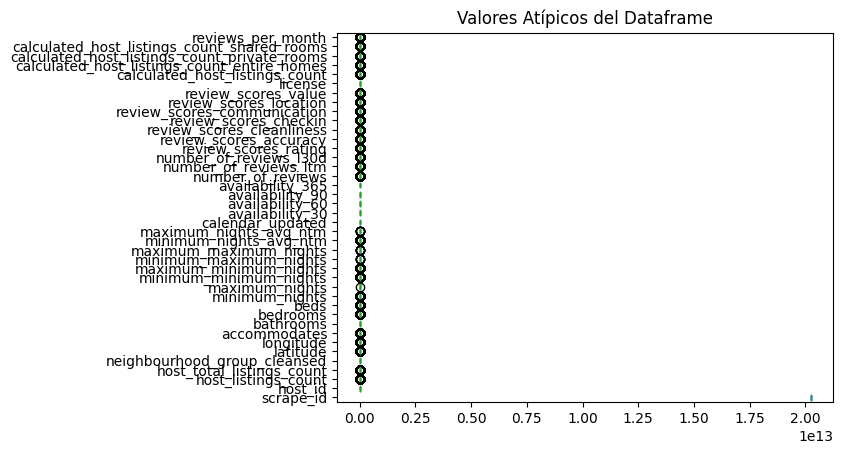

In [311]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanM.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [312]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuanM

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        1.949915e+01
longitude                                      -9.911735e+01
accommodates                                    7.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+00
maximum_minimum_nights                          6.000000e+00
minimum_maximum_nights                          2.265000e+0

In [313]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanM[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35797,NaN,NaN,NaN,NaN,NaN,NaN,-99.27178,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
44616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853923589855678923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
853966732274073000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
854225071295768399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
#Obtenemos datos limpios del Dataframe
cuanM= cuanM[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanM

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,20230329041210,10531228,3.0,7.0,0.0,19.353530,-99.162990,3.0,0.0,1.0,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
2072354,20230329041210,16840050,3.0,3.0,0.0,19.353580,-99.169480,2.0,0.0,1.0,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
696037,20230329041210,3531879,4.0,4.0,0.0,19.441800,-99.184020,6.0,0.0,3.0,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
35797,20230329041210,153786,1.0,1.0,0.0,19.382830,NaN,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.00
44616,20230329041210,196253,16.0,16.0,0.0,19.411620,-99.177940,NaN,0.0,NaN,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853923589855678923,20230329041210,488030249,3.0,4.0,0.0,19.396663,-99.148145,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,0.0,2.0,2.0,0.0,0.0,0.00
853966732274073000,20230329041210,506816029,1.0,1.0,0.0,19.392023,-99.118722,7.0,0.0,2.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.00
854225071295768399,20230329041210,154670560,1.0,6.0,0.0,19.371088,-99.190186,2.0,0.0,2.0,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.00


In [315]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanM.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                             3324
host_total_listings_count                       3453
neighbourhood_group_cleansed                       0
latitude                                        1490
longitude                                       2594
accommodates                                    1090
bathrooms                                          0
bedrooms                                         640
beds                                            2347
minimum_nights                                  3195
maximum_nights                                     1
minimum_minimum_nights                          3082
maximum_minimum_nights                          1895
minimum_maximum_nights                             5
maximum_maximum_nights                             6
minimum_nights_avg_ntm                          1929
maximum_nights_avg_ntm                        

In [316]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
cuanM=cuanM.fillna(round(cuanM.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanM.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


In [317]:
mexico2=pd.merge(cualiM,cuanM , left_index=True, right_index=True, how='outer')
mexico2.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,--,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
2072354,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
696037,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
35797,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.90,4.90,4.90,4.80,0.0,1.0,1.0,0.0,0.0,0.00
44616,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,--,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46


In [318]:
mexico2.isnull().sum().sum()

0

##**FILTROS**

In [319]:
mexico2.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights'

In [320]:
filtro1M= mexico2[mexico2['host_acceptance_rate'] > '50%']
filtro1M['host_acceptance_rate']

id
696037                90%
44616                 86%
2075738               70%
56074                 95%
728372                58%
                     ... 
856446199505406242    92%
856499834474724290    98%
856503637034407689    80%
856541228449710883    99%
854225071295768399    96%
Name: host_acceptance_rate, Length: 9235, dtype: object

In [321]:
filtro2M= mexico2[mexico2['host_is_superhost']== "t"]
filtro2M['host_is_superhost']

id
696037                t
56074                 t
61792                 t
704779                t
728372                t
                     ..
855774527635077059    t
856002521325547866    t
856173561837114843    t
856499834474724290    t
854247693069190865    t
Name: host_is_superhost, Length: 8793, dtype: object

In [322]:
filtro3M= mexico2[mexico2['host_identity_verified']== "f"]
filtro3M['host_identity_verified']

id
2056638               f
131610                f
276504                f
291804                f
298873                f
                     ..
841965092018895031    f
848588787570156425    f
849310790991650241    f
849315893191760444    f
849318651327303243    f
Name: host_identity_verified, Length: 1923, dtype: object

In [323]:
mexico2['property_type'].unique()

array(['Entire loft', 'Entire guest suite', 'Entire rental unit',
       'Entire villa', 'Entire home', 'Entire condo',
       'Private room in home', 'Room in serviced apartment',
       'Entire serviced apartment', 'Private room in rental unit',
       'Private room', 'Tiny home', 'Private room in townhouse',
       'Private room in condo', 'Private room in guest suite',
       'Private room in bed and breakfast', 'Entire guesthouse',
       'Private room in guesthouse', 'Private room in serviced apartment',
       'Shared room in rental unit', 'Room in boutique hotel',
       'Entire bungalow', 'Casa particular', 'Private room in tiny home',
       'Private room in loft', 'Entire townhouse', 'Shared room in condo',
       'Shared room in home', 'Shared room in guesthouse',
       'Room in bed and breakfast', 'Entire cabin',
       'Shared room in hostel', 'Private room in farm stay',
       'Private room in floor', 'Shared room in guest suite',
       'Room in aparthotel', 'Room in 

In [324]:
filtro4M= mexico2[(mexico2['property_type']== 'Private room')|(mexico2['property_type']=='Room in hotel')]
filtro4M['property_type']

id
131610                 Private room
12271259               Private room
16740088              Room in hotel
19639981               Private room
20089283               Private room
                          ...      
847943683426162504    Room in hotel
848657861270688229    Room in hotel
848675026552780800    Room in hotel
848924497208881246    Room in hotel
856668430043912004    Room in hotel
Name: property_type, Length: 424, dtype: object

In [325]:
mexico2['bathrooms']

id
2056638               0.0
2072354               0.0
696037                0.0
35797                 0.0
44616                 0.0
                     ... 
853923589855678923    0.0
853966732274073000    0.0
854225071295768399    0.0
854247693069190865    0.0
854260329845513725    0.0
Name: bathrooms, Length: 24224, dtype: float64

In [326]:
filtro5M= mexico2[mexico2['bathrooms']>1]
filtro5M

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,


In [327]:
mexico2.price= mexico2.price.replace({'\$':''}, regex = True)
mexico2.price= mexico2.price.replace({'\,':''}, regex = True)
mexico2['price'] = mexico2['price'].astype(float)

In [328]:
filtro6M= mexico2[(mexico2['price'] > 10000) & (mexico2["property_type"] == "Entire home")]
filtro6M[['price', 'property_type']]

,price,property_type
id,,
44616,18000.0,Entire home
15145820,12345.0,Entire home
15816189,18154.0,Entire home
21798352,22715.0,Entire home
22329567,21148.0,Entire home
...,...,...
831143943749365415,20000.0,Entire home
828266954841036561,16468.0,Entire home
829074705000164647,13541.0,Entire home


In [329]:
filtro7M= mexico2[mexico2['review_scores_cleanliness']>4.5]
filtro7M['review_scores_cleanliness']

id
2056638               4.95
2072354               4.88
696037                4.71
35797                 4.80
44616                 4.70
                      ... 
853923589855678923    4.80
853966732274073000    4.80
854225071295768399    4.80
854247693069190865    4.80
854260329845513725    4.80
Name: review_scores_cleanliness, Length: 22018, dtype: float64

In [330]:
filtro8M= mexico2[mexico2['review_scores_value']>4.9]
filtro8M['review_scores_value']

id
2083241               4.91
67703                 4.91
70644                 4.92
783080                5.00
2118573               4.95
                      ... 
852767946409179558    5.00
852783467088960077    5.00
853066443231508045    5.00
853138507789476424    5.00
856097336186057624    5.00
Name: review_scores_value, Length: 6484, dtype: float64

In [331]:
filtro9M= mexico2[mexico2['availability_365']<100]
filtro9M['availability_365']

id
696037                87
131610                88
2118573               88
187030                 0
187745                 0
                      ..
855707027566011822    85
857302748334760420    89
857303139403993330    89
856096385840740213    70
856446199505406242    19
Name: availability_365, Length: 5130, dtype: int64

In [332]:
filtro10M= mexico2[mexico2['host_response_time']== 'within an hour']
filtro10M['host_response_time']

id
696037                within an hour
44616                 within an hour
56074                 within an hour
61792                 within an hour
704779                within an hour
                           ...      
853724742831978094    within an hour
853779337045988604    within an hour
853790308958785669    within an hour
853923589855678923    within an hour
854247693069190865    within an hour
Name: host_response_time, Length: 16997, dtype: object

# **ESPAÑA**

In [333]:
#Verificamos información del DataFrame
espana.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19655 entries, 14551.0 to 8.58424e+17
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   19655 non-null  object 
 1   scrape_id                                     19655 non-null  float64
 2   last_scraped                                  19655 non-null  object 
 3   source                                        19655 non-null  object 
 4   name                                          19655 non-null  object 
 5   description                                   19632 non-null  object 
 6   neighborhood_overview                         8342 non-null   object 
 7   picture_url                                   19655 non-null  object 
 8   host_id                                       19655 non-null  int64  
 9   host_url                                      1

##**VALORES NULOS**

In [334]:
#Corroboramos valores nulos
espana.isnull().sum().sum()

174630

In [335]:
cuanE = espana.select_dtypes(include=[np.float, np.int])
cualiE = espana.select_dtypes(include=[np.object])

<ipython-input-335-4d887dee4393>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanE = espana.select_dtypes(include=[np.float, np.int])
<ipython-input-335-4d887dee4393>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [336]:
cualiE.isnull().sum()

listing_url                   0
last_scraped                  0
source                        0
name                          0
description                  23
neighborhood_overview     11313
picture_url                   0
host_url                      0
host_name                   117
host_since                  117
host_location              5559
host_about                 8424
host_response_time         2088
host_response_rate         2088
host_acceptance_rate       1153
host_is_superhost            15
host_thumbnail_url          117
host_picture_url            117
host_neighbourhood        18386
host_verifications            0
host_has_profile_pic        117
host_identity_verified      117
neighbourhood             11313
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               16
amenities                     0
price                         0
has_availability              0
calendar_last_scraped         0
first_re

In [337]:
cualiE= cualiE.fillna("--")

In [338]:
cualiE.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
price                     0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [339]:
cuanE.isnull().sum()

scrape_id                                           0
host_id                                             0
host_listings_count                               117
host_total_listings_count                         117
neighbourhood_group_cleansed                    19655
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       19655
bedrooms                                          503
beds                                               93
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              1
maximum_minimum_nights                              1
minimum_maximum_nights                              1
maximum_maximum_nights                              1
minimum_nights_avg_ntm                              1
maximum_nights_avg_ntm      

In [340]:
cuanE[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]]=cuanE[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]].fillna(0)

In [341]:
cuanE[['calendar_updated','host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds']]= cuanE[['calendar_updated','host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds']].fillna(0)

In [342]:
cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]=cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].fillna(round(cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].mean(),1))

In [343]:
cuanE[['neighbourhood_group_cleansed', 'bathrooms']]=cuanE[['neighbourhood_group_cleansed', 'bathrooms']].fillna(0)

In [344]:
cuanE.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

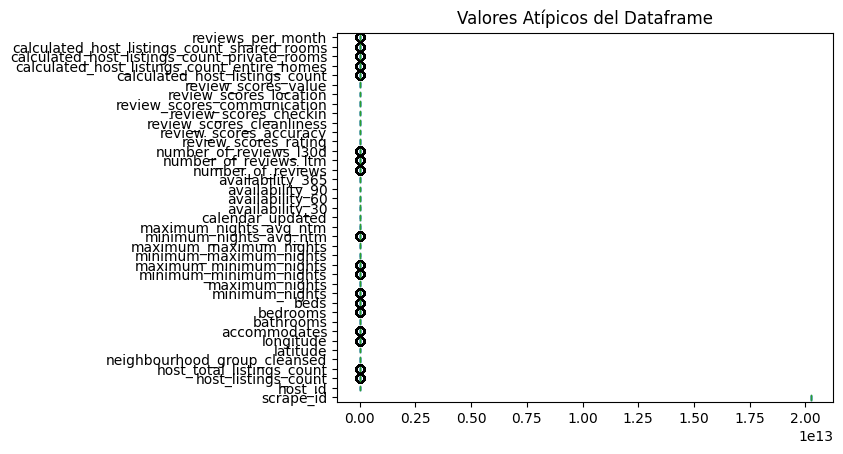

In [345]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanE.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [346]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuanE

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023030e+13
host_id                                         5.298792e+08
host_listings_count                             1.535000e+02
host_total_listings_count                       2.145000e+02
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        4.288548e+01
longitude                                       3.623007e+00
accommodates                                    9.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        6.000000e+00
beds                                            9.500000e+00
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.300000e+01
minimum_maximum_nights                          2.767500e+0

In [347]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanE[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1.455100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1.205757e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1.212820e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.516380e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
4.134200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.583870e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.583960e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.584110e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
#Obtenemos datos limpios del Dataframe
cuanE= cuanE[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanE

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1.455100e+04,2.023030e+13,57237,1.0,5.0,0.0,41.996500,2.836460,2.0,0.0,1.0,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,NaN,0.0,0.37
1.205757e+06,2.023030e+13,6586355,1.0,1.0,0.0,41.793040,2.774120,2.0,0.0,1.0,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,NaN,0.0,0.51
1.212820e+06,2.023030e+13,6620645,2.0,3.0,0.0,42.112840,3.166700,4.0,0.0,1.0,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
7.516380e+05,2.023030e+13,3680160,6.0,6.0,0.0,42.369580,2.980300,2.0,0.0,1.0,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,NaN,0.0,0.08
4.134200e+04,2.023030e+13,180072,2.0,3.0,0.0,42.346550,3.204630,4.0,0.0,1.0,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.583870e+17,2.023030e+13,26281633,34.0,44.0,0.0,41.957265,3.201288,8.0,0.0,4.0,...,0.00,0.00,0.00,0.00,0.00,34.0,34.0,0.0,0.0,0.00
8.583960e+17,2.023030e+13,444428600,3.0,3.0,0.0,41.699070,2.844080,4.0,0.0,1.0,...,0.00,0.00,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.00
8.584110e+17,2.023030e+13,491503593,9.0,11.0,0.0,41.813720,3.064465,4.0,0.0,2.0,...,0.00,0.00,0.00,0.00,0.00,9.0,9.0,0.0,0.0,0.00


In [349]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanE.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                             1832
host_total_listings_count                       2449
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                        926
accommodates                                    1616
bathrooms                                          0
bedrooms                                         294
beds                                             565
minimum_nights                                   449
maximum_nights                                     0
minimum_minimum_nights                           434
maximum_minimum_nights                          1009
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                           607
maximum_nights_avg_ntm                        

In [350]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
cuanE=cuanE.fillna(round(cuanE.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanE.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


In [351]:
espana2=pd.merge(cualiE,cuanE , left_index=True, right_index=True, how='outer')
espana2.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
14551.0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
41342.0,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,25/07/2010,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
45400.0,https://www.airbnb.com/rooms/45400,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,--,https://a0.muscache.com/pictures/2206667/ea3bd...,https://www.airbnb.com/users/show/201228,Oscar,14/08/2010,...,4.73,4.93,4.94,4.89,4.70,1.0,1.0,0.0,0.0,0.20
48764.0,https://www.airbnb.com/rooms/48764,31/03/2023,city scrape,18th C Stone House near Costa Brava,Casa Fluvia is a charming stone village house ...,Torroella de FluviÃ¡ is a small peaceful rural...,https://a0.muscache.com/pictures/19824290/9c7a...,https://www.airbnb.com/users/show/220145,Dick And Ann,01/09/2010,...,4.88,4.97,4.97,4.70,4.82,1.0,1.0,0.0,0.0,0.24
93343.0,https://www.airbnb.com/rooms/93343,01/04/2023,city scrape,Alquiler de casa en La Costa Brava cerca de playa,Siguiendo con nuestra linea de alojamientos co...,Localizada a:<br />Playa : 700 m<br />Supermer...,https://a0.muscache.com/pictures/6656368/7038d...,https://www.airbnb.com/users/show/477826,Francisco,01/04/2011,...,0.00,0.00,0.00,0.00,0.00,3.0,3.0,0.0,0.0,0.00


In [352]:
espana2.isnull().sum().sum()

0

##**FILTROS**

In [353]:
espana2.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maxi

In [354]:
filtro1E= espana2[espana2['host_acceptance_rate'] > '50%']
filtro1E['host_acceptance_rate']

id
1.455100e+04    90%
4.876400e+04    80%
1.067040e+05    65%
1.219620e+05    65%
1.222730e+05    65%
               ... 
8.584700e+17    86%
8.584720e+17    86%
8.585820e+17    96%
8.585880e+17    98%
8.591020e+17    91%
Name: host_acceptance_rate, Length: 10785, dtype: object

In [355]:
filtro2E= espana2[espana2['host_is_superhost']== "t"]
filtro2E['host_is_superhost']

id
1.455100e+04    t
4.540000e+04    t
1.067040e+05    t
1.219620e+05    t
1.222730e+05    t
               ..
8.561710e+17    t
8.570060e+17    t
8.571400e+17    t
8.576970e+17    t
8.583960e+17    t
Name: host_is_superhost, Length: 3118, dtype: object

In [356]:
filtro3E= espana2[espana2['host_identity_verified']== "f"]
filtro3E['host_identity_verified']

id
1.792200e+05    f
2.541000e+05    f
2.730370e+05    f
2.965630e+05    f
3.590560e+05    f
               ..
8.564520e+17    f
8.564530e+17    f
8.564900e+17    f
8.571160e+17    f
8.571180e+17    f
Name: host_identity_verified, Length: 2410, dtype: object

In [357]:
espana2['property_type'].unique()

array(['Private room in condo', 'Entire rental unit', 'Entire home',
       'Entire villa', 'Farm stay', 'Entire townhouse', 'Entire loft',
       'Private room in home', 'Entire condo',
       'Private room in guest suite', 'Private room in townhouse',
       'Entire cottage', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Entire guest suite',
       'Private room in rental unit', 'Entire chalet', 'Castle',
       'Private room in loft', 'Entire cabin',
       'Private room in farm stay', 'Hut', 'Private room in cottage',
       'Private room in villa', 'Barn', 'Private room',
       'Entire vacation home', 'Private room in chalet',
       'Shared room in home', 'Entire bungalow',
       'Entire serviced apartment', 'Private room in bungalow',
       'Casa particular', 'Private room in guesthouse',
       'Entire bed and breakfast', 'Tiny home',
       'Private room in serviced apartment',
       'Private room in casa particular', 'Earthen home',
       'Room in ser

In [358]:
filtro4E= espana2[(espana2['property_type']== 'Private room')|(espana2['property_type']=='Room in hotel')]
filtro4E['property_type']

id
3.054347e+06     Private room
1.461311e+07     Private room
1.711768e+07     Private room
1.901004e+07    Room in hotel
1.901004e+07    Room in hotel
                    ...      
8.341480e+17    Room in hotel
8.381790e+17    Room in hotel
8.382120e+17    Room in hotel
8.412090e+17     Private room
8.461970e+17    Room in hotel
Name: property_type, Length: 204, dtype: object

In [359]:
espana2['bathrooms']

id
1.455100e+04    0.0
4.134200e+04    0.0
4.540000e+04    0.0
4.876400e+04    0.0
9.334300e+04    0.0
               ... 
8.585820e+17    0.0
8.585880e+17    0.0
8.586130e+17    0.0
8.586350e+17    0.0
8.591020e+17    0.0
Name: bathrooms, Length: 21993, dtype: float64

In [360]:
filtro5E= espana2[espana2['bathrooms']>1]
filtro5E

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,


In [361]:
espana2.price= espana2.price.replace({'\$':''}, regex = True)
espana2.price= espana2.price.replace({'\,':''}, regex = True)
espana2['price'] = espana2['price'].astype(float)

In [362]:
filtro6E= espana2[(espana2['price'] > 10000) & (espana2["property_type"] == "Entire home")]
filtro6E[['price', 'property_type']]

,price,property_type
id,,
4682669.0,12986.0,Entire home


In [363]:
filtro7E= espana2[espana2['review_scores_cleanliness']>4.5]
filtro7E['review_scores_cleanliness']

id
1.455100e+04    4.94
4.134200e+04    4.82
4.540000e+04    4.73
4.876400e+04    4.88
1.015800e+05    4.73
                ... 
8.391740e+17    4.60
8.410600e+17    5.00
8.416740e+17    5.00
8.419960e+17    5.00
8.427110e+17    5.00
Name: review_scores_cleanliness, Length: 9633, dtype: float64

In [364]:
filtro8E= espana2[espana2['review_scores_value']>4.9]
filtro8E['review_scores_value']

id
4.382430e+05    4.93
6.843860e+05    4.92
7.743710e+05    4.92
8.091360e+05    5.00
9.343500e+05    5.00
                ... 
8.413170e+17    5.00
8.416740e+17    5.00
8.419960e+17    5.00
8.427110e+17    5.00
8.500410e+17    5.00
Name: review_scores_value, Length: 2691, dtype: float64

In [365]:
filtro9E= espana2[espana2['availability_365']<100]
filtro9E['availability_365']

id
4.134200e+04     0
4.876400e+04    28
9.334300e+04    84
1.688320e+05    47
1.792200e+05     0
                ..
8.584240e+17    92
8.584330e+17    69
8.584700e+17    77
8.584720e+17    56
8.585880e+17    32
Name: availability_365, Length: 5382, dtype: int64

In [366]:
filtro10E= espana2[espana2['host_response_time']== 'within an hour']
filtro10E['host_response_time']

id
1.455100e+04    within an hour
4.540000e+04    within an hour
1.015800e+05    within an hour
1.216660e+05    within an hour
1.223710e+05    within an hour
                     ...      
8.585820e+17    within an hour
8.585880e+17    within an hour
8.586130e+17    within an hour
8.586350e+17    within an hour
8.591020e+17    within an hour
Name: host_response_time, Length: 13434, dtype: object

# **CALIFORNIA**

In [367]:
#Verificamos información del DataFrame
california.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6936 entries, 958.0 to 8.19e+17
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   6936 non-null   object 
 1   scrape_id                                     6936 non-null   float64
 2   last_scraped                                  6936 non-null   object 
 3   source                                        6936 non-null   object 
 4   name                                          6936 non-null   object 
 5   description                                   6889 non-null   object 
 6   neighborhood_overview                         4850 non-null   object 
 7   picture_url                                   6936 non-null   object 
 8   host_id                                       6936 non-null   int64  
 9   host_url                                      6936 no

##**VALORES NULOS**

In [368]:
#Corroboramos valores nulos
california.isnull().sum().sum()

48877

In [369]:
cuanC = espana.select_dtypes(include=[np.float, np.int])
cualiC = espana.select_dtypes(include=[np.object])

<ipython-input-369-a2c888f383b2>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanC = espana.select_dtypes(include=[np.float, np.int])
<ipython-input-369-a2c888f383b2>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [370]:
cualiC.isnull().sum()

listing_url                   0
last_scraped                  0
source                        0
name                          0
description                  23
neighborhood_overview     11313
picture_url                   0
host_url                      0
host_name                   117
host_since                  117
host_location              5559
host_about                 8424
host_response_time         2088
host_response_rate         2088
host_acceptance_rate       1153
host_is_superhost            15
host_thumbnail_url          117
host_picture_url            117
host_neighbourhood        18386
host_verifications            0
host_has_profile_pic        117
host_identity_verified      117
neighbourhood             11313
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               16
amenities                     0
price                         0
has_availability              0
calendar_last_scraped         0
first_re

In [371]:
cualiC= cualiC.fillna("--")

In [372]:
cualiC.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
price                     0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [373]:
cuanC.isnull().sum()

scrape_id                                           0
host_id                                             0
host_listings_count                               117
host_total_listings_count                         117
neighbourhood_group_cleansed                    19655
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       19655
bedrooms                                          503
beds                                               93
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              1
maximum_minimum_nights                              1
minimum_maximum_nights                              1
maximum_maximum_nights                              1
minimum_nights_avg_ntm                              1
maximum_nights_avg_ntm      

In [374]:
cuanC[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]]=cuanC[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]].fillna(0)

In [375]:
cuanC[['calendar_updated','host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds']]= cuanE[['calendar_updated','host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds']].fillna(0)

In [376]:
cuanC[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]=cuanC[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].fillna(round(cuanC[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].mean(),1))

In [377]:
cuanC[['neighbourhood_group_cleansed', 'bathrooms']]=cuanC[['neighbourhood_group_cleansed', 'bathrooms']].fillna(0)

In [378]:
cuanC.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

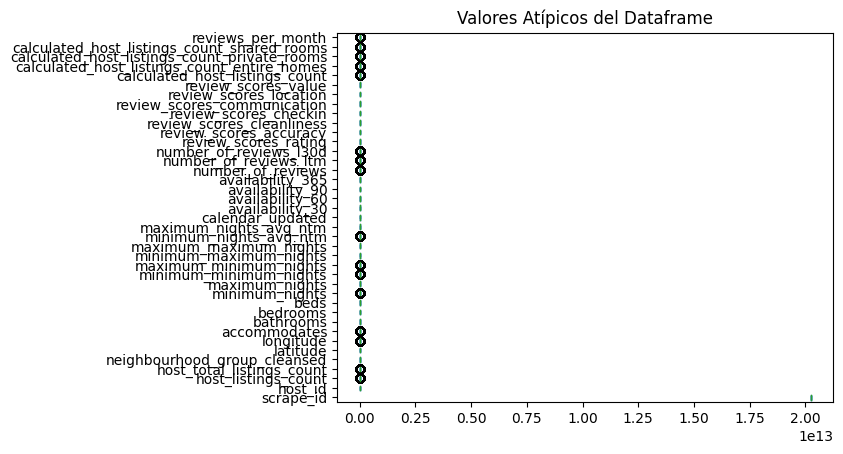

In [379]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanC.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [380]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuanC

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023030e+13
host_id                                         5.298792e+08
host_listings_count                             7.850000e+01
host_total_listings_count                       8.700000e+01
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        4.288548e+01
longitude                                       3.623007e+00
accommodates                                    9.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        6.000000e+00
beds                                            9.500000e+00
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.300000e+01
minimum_maximum_nights                          2.767500e+0

In [381]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanC[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1.455100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1.205757e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1.212820e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.516380e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
4.134200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.583870e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.583960e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.584110e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
#Obtenemos datos limpios del Dataframe
cuanC= cuanC[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanC

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1.455100e+04,2.023030e+13,57237,1.0,5.0,0.0,41.996500,2.836460,2.0,0.0,1.0,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,NaN,0.0,0.37
1.205757e+06,2.023030e+13,6586355,1.0,1.0,0.0,41.793040,2.774120,2.0,0.0,1.0,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,NaN,0.0,0.51
1.212820e+06,2.023030e+13,6620645,2.0,3.0,0.0,42.112840,3.166700,4.0,0.0,1.0,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
7.516380e+05,2.023030e+13,3680160,6.0,6.0,0.0,42.369580,2.980300,2.0,0.0,1.0,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,NaN,0.0,0.08
4.134200e+04,2.023030e+13,180072,2.0,3.0,0.0,42.346550,3.204630,4.0,0.0,1.0,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.583870e+17,2.023030e+13,26281633,34.0,44.0,0.0,41.957265,3.201288,8.0,0.0,4.0,...,0.00,0.00,0.00,0.00,0.00,34.0,34.0,0.0,0.0,0.00
8.583960e+17,2.023030e+13,444428600,3.0,3.0,0.0,41.699070,2.844080,4.0,0.0,1.0,...,0.00,0.00,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.00
8.584110e+17,2.023030e+13,491503593,9.0,11.0,0.0,41.813720,3.064465,4.0,0.0,2.0,...,0.00,0.00,0.00,0.00,0.00,9.0,9.0,0.0,0.0,0.00


In [383]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanC.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                             2396
host_total_listings_count                       2401
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                        926
accommodates                                    1616
bathrooms                                          0
bedrooms                                           0
beds                                               0
minimum_nights                                   449
maximum_nights                                     0
minimum_minimum_nights                           434
maximum_minimum_nights                          1009
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                           607
maximum_nights_avg_ntm                        

In [384]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
cuanC=cuanC.fillna(round(cuanC.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanC.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0


In [385]:
california2=pd.merge(cualiC,cuanC , left_index=True, right_index=True, how='outer')
california2.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
14551.0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
41342.0,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,25/07/2010,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
45400.0,https://www.airbnb.com/rooms/45400,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,--,https://a0.muscache.com/pictures/2206667/ea3bd...,https://www.airbnb.com/users/show/201228,Oscar,14/08/2010,...,4.73,4.93,4.94,4.89,4.70,1.0,1.0,0.0,0.0,0.20
48764.0,https://www.airbnb.com/rooms/48764,31/03/2023,city scrape,18th C Stone House near Costa Brava,Casa Fluvia is a charming stone village house ...,Torroella de FluviÃ¡ is a small peaceful rural...,https://a0.muscache.com/pictures/19824290/9c7a...,https://www.airbnb.com/users/show/220145,Dick And Ann,01/09/2010,...,4.88,4.97,4.97,4.70,4.82,1.0,1.0,0.0,0.0,0.24
93343.0,https://www.airbnb.com/rooms/93343,01/04/2023,city scrape,Alquiler de casa en La Costa Brava cerca de playa,Siguiendo con nuestra linea de alojamientos co...,Localizada a:<br />Playa : 700 m<br />Supermer...,https://a0.muscache.com/pictures/6656368/7038d...,https://www.airbnb.com/users/show/477826,Francisco,01/04/2011,...,0.00,0.00,0.00,0.00,0.00,3.0,3.0,0.0,0.0,0.00


In [386]:
california2.isnull().sum().sum()

0

##**FILTROS**

In [387]:
california2.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maxi

In [388]:
filtro1C= california2[california2['host_acceptance_rate'] > '50%']
filtro1C['host_acceptance_rate']

id
1.455100e+04    90%
4.876400e+04    80%
1.067040e+05    65%
1.219620e+05    65%
1.222730e+05    65%
               ... 
8.584700e+17    86%
8.584720e+17    86%
8.585820e+17    96%
8.585880e+17    98%
8.591020e+17    91%
Name: host_acceptance_rate, Length: 10785, dtype: object

In [389]:
filtro2C= california2[california2['host_is_superhost']== "t"]
filtro2C['host_is_superhost']

id
1.455100e+04    t
4.540000e+04    t
1.067040e+05    t
1.219620e+05    t
1.222730e+05    t
               ..
8.561710e+17    t
8.570060e+17    t
8.571400e+17    t
8.576970e+17    t
8.583960e+17    t
Name: host_is_superhost, Length: 3118, dtype: object

In [390]:
filtro3C= california2[california2['host_identity_verified']== "f"]
filtro3C['host_identity_verified']

id
1.792200e+05    f
2.541000e+05    f
2.730370e+05    f
2.965630e+05    f
3.590560e+05    f
               ..
8.564520e+17    f
8.564530e+17    f
8.564900e+17    f
8.571160e+17    f
8.571180e+17    f
Name: host_identity_verified, Length: 2410, dtype: object

In [391]:
california2['property_type'].unique()

array(['Private room in condo', 'Entire rental unit', 'Entire home',
       'Entire villa', 'Farm stay', 'Entire townhouse', 'Entire loft',
       'Private room in home', 'Entire condo',
       'Private room in guest suite', 'Private room in townhouse',
       'Entire cottage', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Entire guest suite',
       'Private room in rental unit', 'Entire chalet', 'Castle',
       'Private room in loft', 'Entire cabin',
       'Private room in farm stay', 'Hut', 'Private room in cottage',
       'Private room in villa', 'Barn', 'Private room',
       'Entire vacation home', 'Private room in chalet',
       'Shared room in home', 'Entire bungalow',
       'Entire serviced apartment', 'Private room in bungalow',
       'Casa particular', 'Private room in guesthouse',
       'Entire bed and breakfast', 'Tiny home',
       'Private room in serviced apartment',
       'Private room in casa particular', 'Earthen home',
       'Room in ser

In [392]:
filtro4C= california2[(california2['property_type']== 'Private room')|(california2['property_type']=='Room in hotel')]
filtro4C['property_type']

id
3.054347e+06     Private room
1.461311e+07     Private room
1.711768e+07     Private room
1.901004e+07    Room in hotel
1.901004e+07    Room in hotel
                    ...      
8.341480e+17    Room in hotel
8.381790e+17    Room in hotel
8.382120e+17    Room in hotel
8.412090e+17     Private room
8.461970e+17    Room in hotel
Name: property_type, Length: 204, dtype: object

In [393]:
california2['bathrooms']

id
1.455100e+04    0.0
4.134200e+04    0.0
4.540000e+04    0.0
4.876400e+04    0.0
9.334300e+04    0.0
               ... 
8.585820e+17    0.0
8.585880e+17    0.0
8.586130e+17    0.0
8.586350e+17    0.0
8.591020e+17    0.0
Name: bathrooms, Length: 21993, dtype: float64

In [394]:
filtro5C= california2[california2['bathrooms']>1]
filtro5C

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,


In [395]:
california2.price= california2.price.replace({'\$':''}, regex = True)
california2.price= california2.price.replace({'\,':''}, regex = True)
california2['price'] = california2['price'].astype(float)

In [396]:
filtro6C= california2[(california2['price'] > 10000) & (california2["property_type"] == "Entire home")]
filtro6C[['price', 'property_type']]

,price,property_type
id,,
4682669.0,12986.0,Entire home


In [397]:
filtro7C= california2[california2['review_scores_cleanliness']>4.5]
filtro7C['review_scores_cleanliness']

id
1.455100e+04    4.94
4.134200e+04    4.82
4.540000e+04    4.73
4.876400e+04    4.88
1.015800e+05    4.73
                ... 
8.391740e+17    4.60
8.410600e+17    5.00
8.416740e+17    5.00
8.419960e+17    5.00
8.427110e+17    5.00
Name: review_scores_cleanliness, Length: 9633, dtype: float64

In [398]:
filtro8C= california2[california2['review_scores_value']>4.9]
filtro8C['review_scores_value']

id
4.382430e+05    4.93
6.843860e+05    4.92
7.743710e+05    4.92
8.091360e+05    5.00
9.343500e+05    5.00
                ... 
8.413170e+17    5.00
8.416740e+17    5.00
8.419960e+17    5.00
8.427110e+17    5.00
8.500410e+17    5.00
Name: review_scores_value, Length: 2691, dtype: float64

In [399]:
filtro9C= california2[california2['availability_365']<100]
filtro9C['availability_365']

id
4.134200e+04     0
4.876400e+04    28
9.334300e+04    84
1.688320e+05    47
1.792200e+05     0
                ..
8.584240e+17    92
8.584330e+17    69
8.584700e+17    77
8.584720e+17    56
8.585880e+17    32
Name: availability_365, Length: 5382, dtype: int64

In [400]:
filtro10C= california2[california2['host_response_time']== 'within an hour']
filtro10C['host_response_time']

id
1.455100e+04    within an hour
4.540000e+04    within an hour
1.015800e+05    within an hour
1.216660e+05    within an hour
1.223710e+05    within an hour
                     ...      
8.585820e+17    within an hour
8.585880e+17    within an hour
8.586130e+17    within an hour
8.586350e+17    within an hour
8.591020e+17    within an hour
Name: host_response_time, Length: 13434, dtype: object

In [401]:
#Convertir archivo filtrado a CSV
filtro1M.to_csv("filtro1M.csv")
filtro2M.to_csv("filtro2M.csv")
filtro3M.to_csv("filtro3M.csv")
filtro4M.to_csv("filtro4M.csv")
filtro5M.to_csv("filtro5M.csv")
filtro6M.to_csv("filtro6M.csv")
filtro7M.to_csv("filtro7M.csv")
filtro8M.to_csv("filtro8M.csv")
filtro9M.to_csv("filtro9M.csv")
filtro10M.to_csv("filtro10M.csv")

In [402]:
#Convertir archivo filtrado a CSV
filtro1E.to_csv("filtro1E.csv")
filtro2E.to_csv("filtro2E.csv")
filtro3E.to_csv("filtro3E.csv")
filtro4E.to_csv("filtro4E.csv")
filtro5E.to_csv("filtro5E.csv")
filtro6E.to_csv("filtro6E.csv")
filtro7E.to_csv("filtro7E.csv")
filtro8E.to_csv("filtro8E.csv")
filtro9E.to_csv("filtro9E.csv")
filtro10E.to_csv("filtro10E.csv")

In [403]:
#Convertir archivo filtrado a CSV
filtro1C.to_csv("filtro1C.csv")
filtro2C.to_csv("filtro2C.csv")
filtro3C.to_csv("filtro3C.csv")
filtro4C.to_csv("filtro4C.csv")
filtro5C.to_csv("filtro5C.csv")
filtro6C.to_csv("filtro6C.csv")
filtro7C.to_csv("filtro7C.csv")
filtro8C.to_csv("filtro8C.csv")
filtro9C.to_csv("filtro9C.csv")
filtro10C.to_csv("filtro10C.csv")

In [405]:
#descardar archivo filtrado en csv
from google.colab import files     
files.download("filtro1M.csv")
files.download("filtro2M.csv")
files.download("filtro3M.csv")
files.download("filtro4M.csv")
files.download("filtro5M.csv")
files.download("filtro6M.csv")
files.download("filtro7M.csv")
files.download("filtro8M.csv")
files.download("filtro9M.csv")
files.download("filtro10M.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [406]:
#descardar archivo filtrado en csv
from google.colab import files     
files.download("filtro1E.csv")
files.download("filtro2E.csv")
files.download("filtro3E.csv")
files.download("filtro4E.csv")
files.download("filtro5E.csv")
files.download("filtro6E.csv")
files.download("filtro7E.csv")
files.download("filtro8E.csv")
files.download("filtro9E.csv")
files.download("filtro10E.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [407]:
files.download("filtro1E.csv")
files.download("filtro7E.csv")
files.download("filtro10E.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [408]:
#descardar archivo filtrado en csv
from google.colab import files     
files.download("filtro1C.csv")
files.download("filtro2C.csv")
files.download("filtro3C.csv")
files.download("filtro4C.csv")
files.download("filtro5C.csv")
files.download("filtro6C.csv")
files.download("filtro7C.csv")
files.download("filtro8C.csv")
files.download("filtro9C.csv")
files.download("filtro10C.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>